<h1><center>Titanic Survival Prediction

## Problem Statement:

The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.  One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive and predict which passengers survived the tragedy.


## Hypothesis:
1. Children, women and the elderly are more likely to survive than other male adults.
2. Persons who paid higher fares are more likely to survive.
3. Persons in a higher class are more likely to survive than those in lower class.

In [1]:
#Libraries
import numpy as np #For arrays and mathematical computations
import pandas as pd # For the dataframe management and manipulation
import sklearn as sk # For utilizating machine learning algorithms
import seaborn as sb # for creating beautiful plots
%matplotlib inline 

## Data Acquisition

Load data into a DataFrame from local machine or from the internet url

In [2]:
#Read Data from File
location = r"C:\Users\Latoya Clarke\Documents\Python Scripts\train.csv"
titanic = pd.read_csv(location)
titanic.head()

#Cabin field showing missing values
#Several numeric fields such as Survived and Pclass are categorical fields

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Data Exploration

### Variable Identification

Target Variable: **Survived** 

Predictor Variable: **Pclass, Sex, Age, Fare**

### Univariate Analysis

In [3]:
titanic.info()

#Age, Cabin, embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 12 columns):
PassengerId    691 non-null int64
Survived       691 non-null int64
Pclass         691 non-null int64
Name           691 non-null object
Sex            691 non-null object
Age            548 non-null float64
SibSp          691 non-null int64
Parch          691 non-null int64
Ticket         691 non-null object
Fare           691 non-null float64
Cabin          155 non-null object
Embarked       690 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 64.9+ KB


In [4]:
titanic.describe()

#Ignore PassengerID as it is categorical
#Parent/Children field goes up to 6
#Sibling/Spouse fiels goes up to 8
#The fare has a wide range as the lowest fare is $0 and the highest is %512.39
#75% of the persons on the titanic are 38 or younger

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,691.000000,691.000000,691.000000,548.000000,691.000000,691.000000,691.000000
mean,346.000000,0.387844,2.308249,29.921989,0.538350,0.387844,32.276103
std,199.618803,0.487612,0.835224,14.598391,1.076585,0.821855,48.447543
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,173.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,346.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,518.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,691.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.corr()

#Survived seem to correlate positively strong with Parch and weaker with Fare.
#Survived also seem to correlate negatively strong with Age and weakly with Pclass
#The Number of Parents/Children (Parch) will also be considered for the analysis 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.012284,-0.064985,0.100810,-0.074127,0.003507,0.037857
Survived,0.012284,1.000000,-0.318885,-0.077312,-0.033896,0.061689,0.229339
Pclass,-0.064985,-0.318885,1.000000,-0.373770,0.090793,0.013490,-0.568966
Age,0.100810,-0.077312,-0.373770,1.000000,-0.331680,-0.206289,0.085428
SibSp,-0.074127,-0.033896,0.090793,-0.331680,1.000000,0.402487,0.160064
Parch,0.003507,0.061689,0.013490,-0.206289,0.402487,1.000000,0.230892
Fare,0.037857,0.229339,-0.568966,0.085428,0.160064,0.230892,1.000000


In [6]:
#Filter categorical variables
categorical_columns = [x for x in titanic.dtypes.index if titanic.dtypes[x]=='object']

#Exclude ID and irrelevant columns:
categorical_columns = [x for x in categorical_columns if x not in ['PassengerId', 'Cabin','Name', 'Ticket']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories: %s'%col)
    print(titanic[col].value_counts())
    
#More males than females were onboard the ship
# More persons Embarked the ship at location S, vs the location C and Q. The last number of persons embarked at location Q


Frequency of Categories: Sex
male      442
female    249
Name: Sex, dtype: int64

Frequency of Categories: Embarked
S    497
C    131
Q     62
Name: Embarked, dtype: int64


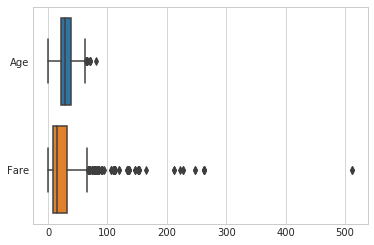

In [7]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");

#Graph shows that the fare has numerous outliers with one must evident is the datapoint above $500

In [8]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

### Bivariate Analysis

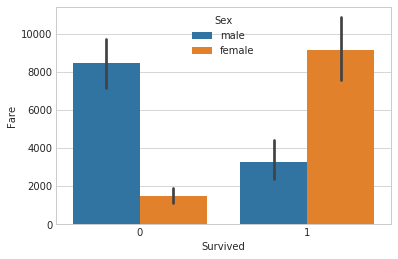

In [9]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Sex', estimator = np.sum)


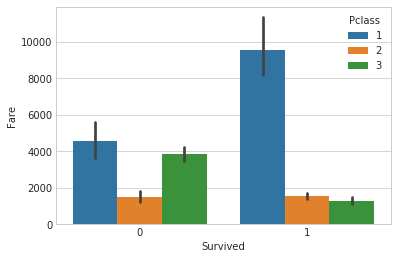

In [10]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Pclass', estimator = np.sum)

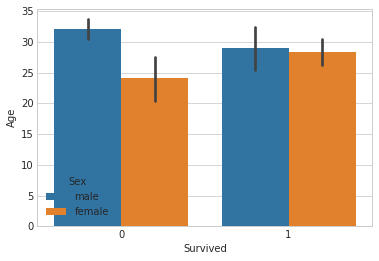

In [11]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Sex', estimator = np.mean)

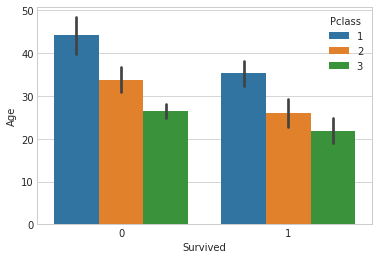

In [12]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Pclass', estimator = np.mean)
    
#The average ages of persons survived vs died are different where the persons that survived have relatively lower averages than
#the persons that died. 
# The persons in class 1 is more likely to survived than class 2 which is more likely to survive than class 3.

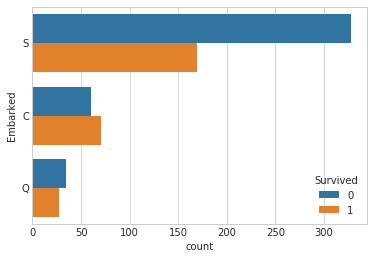

In [13]:
# Showing total servived ages by Embarked
with sb.axes_style('whitegrid'):
    sb.countplot(data=titanic, y = 'Embarked', hue ='Survived')

#The persons embarked at S had a higher overall percentage survival rate than the persons embarked at locations C and Q
#At Location C, you are more likely to survive than Die.

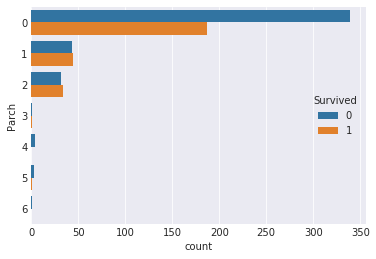

In [14]:
# Showing the number of Parch by Survival
with sb.axes_style('darkgrid'):
    sb.countplot(data=titanic, y = 'Parch', hue ='Survived')

#People are more likely to survive if they have 0-3 Parent/Children onboard
#If persons had 1 or 2 child or parent on board, they are more likely to survive than die.

### Missing Value Treatment

In [15]:
#Filling the missing age values with the average age of the dataset
titanic['Age']= titanic['Age'].fillna(int(titanic['Age'].mean()))
titanic.Age.isnull().any()

False

In [16]:
#Finding the mode of the Embarked field
titanic['Embarked'].mode()

0    S
dtype: object

In [17]:
#Using the mode 'S' is used to fill the missing value in Embarked field
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.Embarked.isnull().any()

False

### Outlier Detection and Treatment

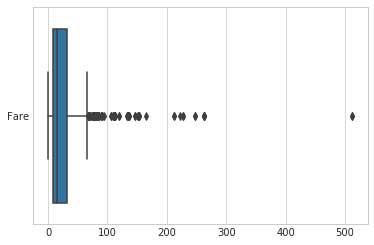

In [18]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp', 'Age'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");

#Fare is seem to have several outliers from the original data

In [19]:
#Counting all fares above $200
titanic.query('Fare > 200').count()

#This shows 14 records above fare $200

PassengerId    14
Survived       14
Pclass         14
Name           14
Sex            14
Age            14
SibSp          14
Parch          14
Ticket         14
Fare           14
Cabin          11
Embarked       14
dtype: int64

In [20]:
#Viewing the dataset above Fare $200
titanic.query('Fare > 200')

#The ticket seem to be valid for Fares over 500. More than one person has the same ticket number for that price.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [21]:
# Counting the number of Tickets PC 17755 in dataset
titanic.loc[titanic['Ticket'] == 'PC 17755']


#Results show only 2 tickets which are the ones for $512.3292
#So these outliers will not be addressed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


## Model Building

In [22]:
#Creating labels for the dataset
y = np.array(titanic.Survived)

In [23]:
#Creating features for training
titanic_selected = titanic.drop(['PassengerId','Survived','Cabin', 'Ticket', 'SibSp'], axis = 1)
X= titanic_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [24]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#The data has been split using 80% for training and 20% for testing

In [25]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

In [26]:
# Showing accuracy of prediction 
from sklearn.metrics import accuracy_score
print("Accuracy: ", round(100* accuracy_score(predicted, y_test),2),"%")
#Prediction algorithm shows an accuracy of 83.45%

Accuracy:  83.45 %


<center>Shamar Morgan (B.Eng)<center>
<center>Electrical Engineering<center>
<center>*Data Scientist*<center>